# Merging Two Subsets of Pulsar Dataset and Performing Operations

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Original Dataset

In [2]:
df = pd.read_csv("pulsar_data_train.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## 3. Create Two Subsets of 1100 Entries Each

In [3]:
sample_A = df.iloc[:1100]
sample_B = df.iloc[1100:2200]

sample_A.shape, sample_B.shape

((1100, 9), (1100, 9))

## 4. Merge the Two Subsets (Row-wise Concatenation)

In [4]:
merged_df = pd.concat([sample_A, sample_B], axis=0)
merged_df.reset_index(drop=True, inplace=True)

merged_df.shape

(2200, 9)

## 5. Basic Data Inspection

In [5]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                2200 non-null   float64
 1    Standard deviation of the integrated profile  2200 non-null   float64
 2    Excess kurtosis of the integrated profile     1926 non-null   float64
 3    Skewness of the integrated profile            2200 non-null   float64
 4    Mean of the DM-SNR curve                      2200 non-null   float64
 5    Standard deviation of the DM-SNR curve        1999 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           2200 non-null   float64
 7    Skewness of the DM-SNR curve                  2095 non-null   float64
 8   target_class                                   2200 non-null   float64
dtypes: float64(9)
memory usage: 154.8 KB


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## 6. Missing Value Analysis

In [6]:
merged_df.isnull().sum()

 Mean of the integrated profile                    0
 Standard deviation of the integrated profile      0
 Excess kurtosis of the integrated profile       274
 Skewness of the integrated profile                0
 Mean of the DM-SNR curve                          0
 Standard deviation of the DM-SNR curve          201
 Excess kurtosis of the DM-SNR curve               0
 Skewness of the DM-SNR curve                    105
target_class                                       0
dtype: int64

## 7. Descriptive Statistics

In [7]:
merged_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,2200.000000,2200.000000,1926.000000,2200.000000,2200.000000,1999.000000,2200.000000,2095.000000,2200.000000
mean,110.901520,46.430743,0.473904,1.675157,12.028787,25.919137,8.456875,108.578919,0.098636
std,25.686623,6.657827,1.021880,5.555933,28.003784,19.447664,4.636152,116.064553,0.298241
min,6.414062,27.791573,-1.439831,-1.185706,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.724609,42.333972,0.018266,-0.187647,1.879390,14.322796,5.938112,37.041681,0.000000
50%,114.750000,46.857598,0.220056,0.205726,2.740803,18.051558,8.568235,85.997793,0.000000
75%,127.400391,50.886763,0.482908,1.001786,5.108278,27.248443,10.741912,138.379152,0.000000
max,177.828125,79.084407,7.172623,53.193433,208.629599,110.642211,34.539844,1191.000837,1.000000


## 8. Class Distribution Analysis

In [8]:
merged_df['target_class'].value_counts()

target_class
0.0    1983
1.0     217
Name: count, dtype: int64

## 9. Correlation Analysis

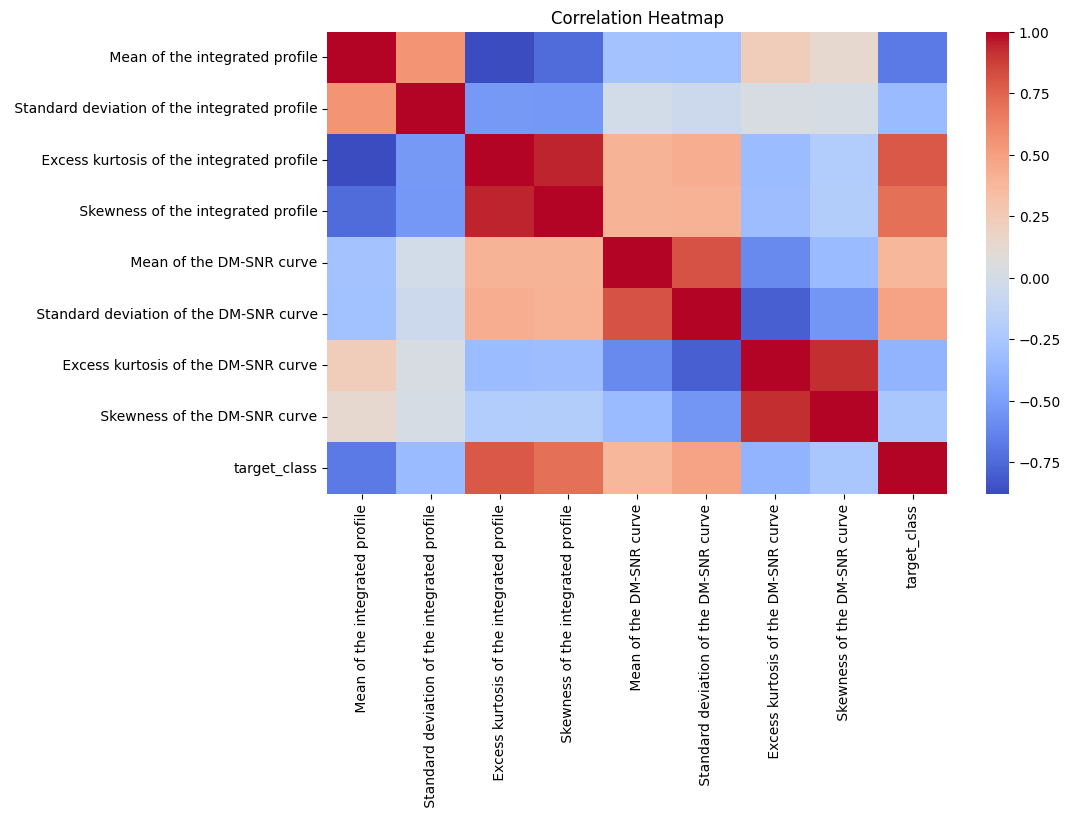

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 10. Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

X = merged_df.drop('target_class', axis=1)
y = merged_df['target_class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 0.3993153 ,  0.29178735, -0.09633693, -0.30394653, -0.31645385,
        -0.38676379, -0.21725549, -0.37418821],
       [-1.32132918, -1.54067063,  0.23393738,  0.30849018, -0.34392891,
        -0.42936926,  0.20663589, -0.05046624],
       [ 0.76650375,  1.02140481, -0.33329153, -0.35508838, -0.33165472,
        -0.18292552,  0.01110853, -0.29772951],
       [ 1.77163271,  0.36584803, -0.67529599, -0.33241413,  0.19440309,
                nan, -1.18634142, -0.87369726],
       [-1.01620075, -1.54936878,  0.34368021,  0.28786012, -0.32998233,
        -0.27265254, -0.01118989, -0.27825463]])

## 11. Simple Classification Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 12. Save Final Merged Dataset

In [12]:
merged_df.to_csv("merged_pulsar_2200.csv", index=False)